# 1-Kmeans算法
## 案例：给定一个二维数据集，使用Kmeans进行聚类
### 数据集：ex7data2.mat

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1 = sio.loadmat('ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data1['X']
X.shape

(300, 2)

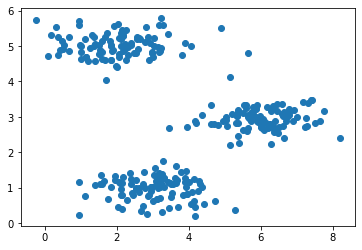

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [10]:
def find_centroids(X,centros):
    """获取每个样本所属类别"""
    idx = []
    
    for i in range(len(X)):
        #（2，）-（k，2）->(k,2)->(k,)
        dist = np.linalg.norm((X[i] - centros),axis=1) #np.linalg.norm()取2范数
        id_i = np.argmin(dist) #取最小值的索引
        idx.append(id_i)
    
    return np.array(idx)

In [11]:
centros = np.array([[3,3],[6,2],[8,5]])
idx = find_centroids(X,centros)
idx[:3]

array([0, 2, 1], dtype=int64)

In [13]:
def compute_centros(X,idx,k):
    """计算聚类中心点"""
    centros = []
    
    for i in range(k):
        centros_i = np.mean(X[idx == i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [14]:
compute_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [15]:
def run_Kmeans(X,centros,iters):
    """Kmeans算法"""
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    
    for i in range(iters):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X,idx,k)
        centros_all.append(centros_i)
        
    return idx,np.array(centros_all)

In [16]:
def plot_data(X,centros_all,idx):
    """绘制数据集"""
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

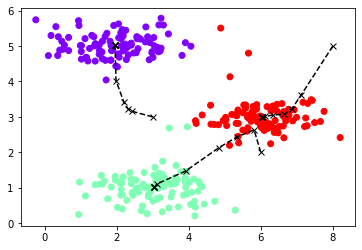

In [17]:
idx,centros_all = run_Kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

### 观察初始聚类点位置对聚类效果的影响

In [19]:
def init_centros(X,k):
    """初始化聚类点为随机样本点"""
    index = np.random.choice(len(X),k)
    return X[index]

In [20]:
init_centros(X,k=3)

array([[2.17777173, 4.86154019],
       [5.32615581, 3.03314047],
       [5.33533999, 3.03928694]])

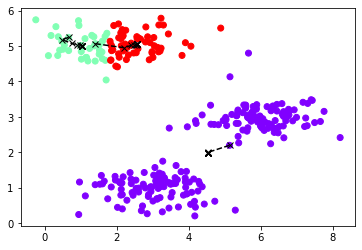

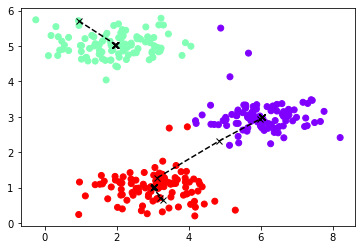

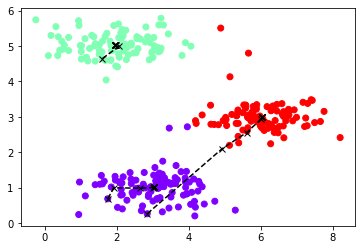

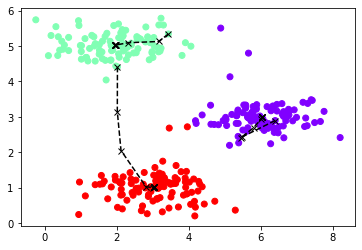

In [22]:
for i in range(4):
    idx,centros_all = run_Kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)

### 第一张图由于初始聚类点位置不当产生了局部最优